In [29]:
import pandas as pd
import numpy as np
from IPython.display import display

In [30]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv")

In [31]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [32]:
df.columns = df.columns.str.lower().str.replace(" ", "-")


categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '-')

In [33]:
df.head().T

,0,1,2,3,4
lead_source,paid_ads,social_media,events,paid_ads,referral
industry,NaN,retail,healthcare,retail,education
number_of_courses_viewed,1,1,5,2,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0
employment_status,unemployed,employed,unemployed,NaN,self_employed
location,south_america,south_america,australia,australia,europe
interaction_count,4,1,3,1,3
lead_score,0.94,0.8,0.69,0.87,0.62
converted,1,0,1,0,1


In [34]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [35]:
categorical = ['lead_source','industry', 'employment_status', 'location']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score','converted']

In [36]:
df[categorical].isnull().sum()

lead_source          128
industry             134
employment_status    100
location              63
dtype: int64

In [37]:
df[numerical].isnull().sum()

number_of_courses_viewed      0
annual_income               181
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [38]:
for i in categorical:
    df[i] = df[i].fillna('NA')

for j in numerical:
    df[j] = df[j].fillna(0.0)

In [39]:
df.industry.value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

In [40]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [41]:
df[numerical].corrwith(df['annual_income']).abs

<bound method NDFrame.abs of number_of_courses_viewed    0.009770
annual_income               1.000000
interaction_count           0.027036
lead_score                  0.015610
converted                   0.053131
dtype: float64>

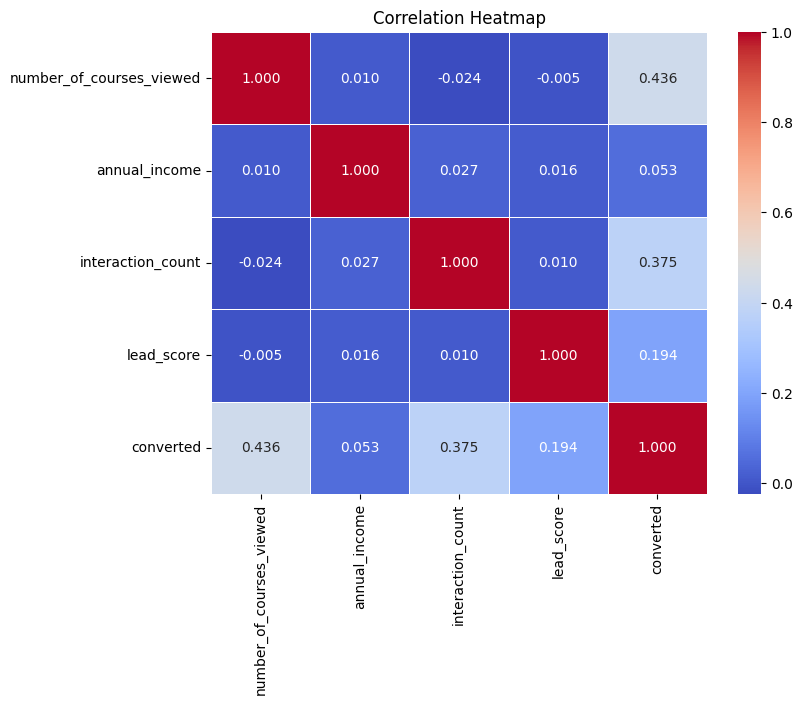

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = df[numerical].corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
interaction_count and lead_score = 0.010
number_of_courses_viewed and lead_score = -0.005
number_of_courses_viewed and interaction_count = -0.024
annual_income and interaction_count = 0.027

In [43]:
correlation_matirx = df.corr(numeric_only=True)
print(correlation_matirx)

                          number_of_courses_viewed  annual_income  \
number_of_courses_viewed                  1.000000       0.009770   
annual_income                             0.009770       1.000000   
interaction_count                        -0.023565       0.027036   
lead_score                               -0.004879       0.015610   
converted                                 0.435914       0.053131   

                          interaction_count  lead_score  converted  
number_of_courses_viewed          -0.023565   -0.004879   0.435914  
annual_income                      0.027036    0.015610   0.053131  
interaction_count                  1.000000    0.009888   0.374573  
lead_score                         0.009888    1.000000   0.193673  
converted                          0.374573    0.193673   1.000000  


In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop(columns='converted')
y = df['converted']

In [47]:
# Split the data into training and temporary (validation + test) sets
df_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Now split the temporary set into validation and test sets
df_val, df_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [60]:
from sklearn.metrics import mutual_info_score

In [55]:
df_full_train, df_test = train_test_split(df, test_size= 0.2,random_state=1)


In [56]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.converted)

In [57]:
df_train =df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)


df_full_train = df_full_train.reset_index(drop=True)

In [61]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

lead_source          0.024562
employment_status    0.012690
industry             0.008173
location             0.001212
dtype: float64

In [62]:
from sklearn.feature_extraction import DictVectorizer

In [66]:
categorical

['lead_source', 'industry', 'employment_status', 'location']

In [120]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[['lead_source', 'industry', 'employment_status', 'location', 'number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']].to_dict(orient='records')

X_train = dv.fit_transform(train_dict)

val_dict = df_val[['lead_source', 'industry', 'employment_status', 'location', 'number_of_courses_viewed','annual_income',
 'interaction_count','lead_score']].to_dict(orient='records')
X_val = dv.fit_transform(val_dict)

In [110]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] *w[j]
    result = sigmoid(score)
    return result

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [123]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [124]:
model_intercept_[0]

NameError: name 'model_intercept_' is not defined

In [125]:
model_coef_[0].round(3)

NameError: name 'model_coef_' is not defined

In [126]:
y_pred = model.predict_proba(X_val)[:,1]

In [127]:
converted_decision = (y_pred >= 0.5)

In [128]:
(y_val == converted_decision).mean()

np.float64(0.7431506849315068)

In [133]:
def model_c(v):
    model = LogisticRegression(solver='liblinear', C=v, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:,1]
    converted_decision = (y_pred >= 0.5)
    return (y_val == converted_decision).mean()

In [134]:
c = [0.01, 0.1, 1.0, 10.0, 100.0]
for j in c:
    print(model_c(j))

0.7363013698630136
0.7431506849315068
0.7431506849315068
0.7431506849315068
0.7431506849315068


0.0

In [79]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = converted_decision.astype(int)
df_pred['actual'] = y_val

In [80]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [81]:
df_pred.correct.mean()

np.float64(0.10616438356164383)

In [83]:
converted_decision.astype(int)

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [84]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'annual_income': np.float64(-0.0),
 'employment_status=NA': np.float64(-0.014),
 'employment_status=employed': np.float64(0.03),
 'employment_status=self_employed': np.float64(0.018),
 'employment_status=student': np.float64(0.012),
 'employment_status=unemployed': np.float64(-0.106),
 'industry=NA': np.float64(-0.021),
 'industry=education': np.float64(0.054),
 'industry=finance': np.float64(-0.025),
 'industry=healthcare': np.float64(-0.022),
 'industry=manufacturing': np.float64(-0.011),
 'industry=other': np.float64(-0.004),
 'industry=retail': np.float64(-0.016),
 'industry=technology': np.float64(-0.014),
 'interaction_count': np.float64(0.299),
 'lead_score': np.float64(0.047),
 'lead_source=NA': np.float64(0.009),
 'lead_source=events': np.float64(-0.014),
 'lead_source=organic_search': np.float64(-0.014),
 'lead_source=paid_ads': np.float64(-0.096),
 'lead_source=referral': np.float64(0.071),
 'lead_source=social_media': np.float64(-0.015),
 'location=NA': np.float64(0.005),
